<IPython.core.display.Javascript object>


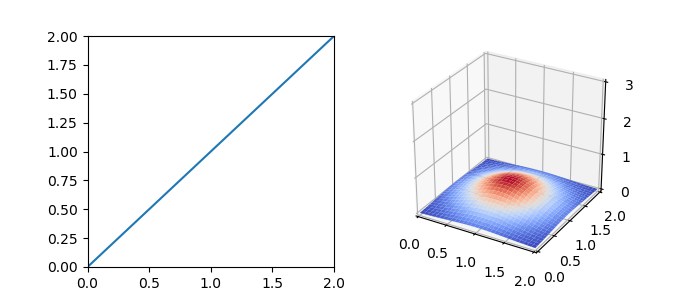

In [3]:
%matplotlib notebook
#We can use scipy library to generate Gaussian probability density function
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box, VBox, HBox
from scipy.stats import multivariate_normal
#This is our mean point
mu = np.block([1,1])

labels = [
widgets.Text(
    value='Sigma X',
    description='',
    disabled=True
),
widgets.Text(
    value='Sigma Y',
    description='',
    disabled=True
)
,
widgets.Text(
    value='Sigma XY',
    description='',
    disabled=True
)]
sliders = [
    widgets.FloatSlider(min=0.1,max=1,step=0.05),
    widgets.FloatSlider(min=0.1,max=1,step=0.05),
    widgets.FloatSlider(min=-0.9,max=0.9,step=0.05)
]

def update(change):
    sigma_x = sliders[0].value
    sigma_y = sliders[1].value
    sigma_xy = sliders[2].value
    #if sigma_xy >= sigma_x or sigma_xy >= sigma_y:
    #    sigma_xy = min(sigma_x,sigma_y)-1e-3
    #    sliders[2].value = sigma_xy
    
    S = np.block([[sigma_x*sigma_x,sigma_xy*sigma_x*sigma_y],[sigma_x*sigma_y*sigma_xy,sigma_y*sigma_y]])
    #S = np.linalg.inv(S)
    p = 0.5
    s = -2 * np.log(1 - p)
    e_vals, e_vecs = np.linalg.eig(S * s)
    ellipse = (e_vecs @ np.sqrt(np.diag(e_vals))) @ np.block([[np.cos(t)],[np.sin(t)]])
    ellipse = ellipse + mu.reshape(-1,1)
    elps.set_data(ellipse[0,:],ellipse[1,:])
    z = multivariate_normal.pdf(xy, mean=mu[:], cov=S)
    z = z.reshape(x.shape)
    surfs[0].remove()
    surfs[0] = ax2.plot_surface(x,y,z,cmap=cm.coolwarm)
    fig.canvas.draw()
    pass

for s in sliders:
    s.observe(update, names='value')

t = np.linspace(0, 2 * np.pi)
fig = plt.figure()
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(7, 3, forward=True)
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlim(0,2)
ax1.set_ylim(0,2)

display(VBox([Box(labels), Box(sliders)]))
elps, = ax1.plot(t,t)

x, y = np.mgrid[0.0:2.0:30j, 0:2.0:30j]
# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])
sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)
z = multivariate_normal.pdf(xy, mean=mu[:], cov=covariance)
z = z.reshape(x.shape)
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlim(0,2)
ax2.set_ylim(0,2)
ax2.set_zlim(0,3)
surf = ax2.plot_surface(x,y,z,cmap=cm.coolwarm)
surfs = [surf]
plt.show()